In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:

train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [11]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [13]:
print(f"Missing values in train data: \n{train_data.isnull().sum()}")

Missing values in train data: 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [14]:
print(f"Missing values in test data: \n{test_data.isnull().sum()}")

Missing values in test data: 
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


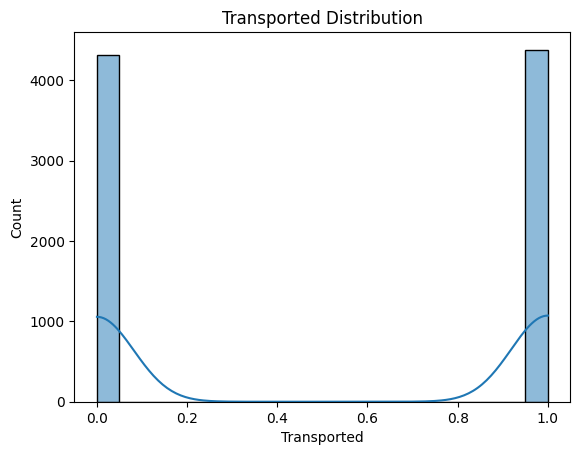

In [15]:
sns.histplot(train_data['Transported'], bins=20, kde=True)
plt.title("Transported Distribution")
plt.show()

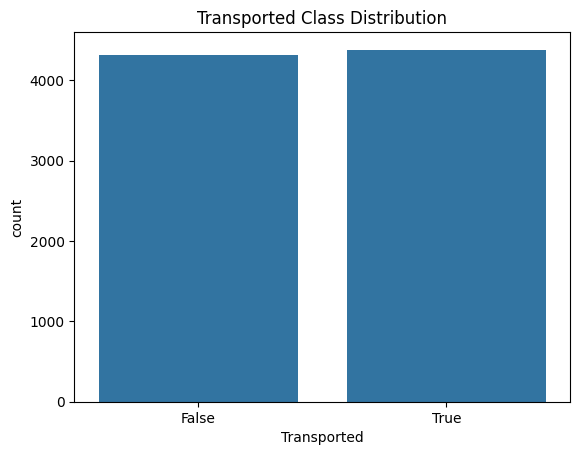

In [16]:
sns.countplot(x=train_data['Transported'])
plt.title("Transported Class Distribution")
plt.show()

In [17]:
print(train_data['Transported'].value_counts())

Transported
True     4378
False    4315
Name: count, dtype: int64


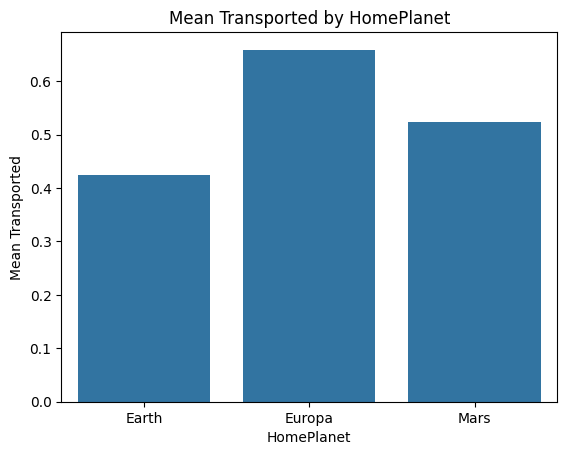

In [18]:
mean_transported = train_data.groupby('HomePlanet')['Transported'].mean()
sns.barplot(x=mean_transported.index, y=mean_transported.values)
plt.ylabel('Mean Transported')
plt.title('Mean Transported by HomePlanet')
plt.show()

In [20]:
print(train_data['HomePlanet'].unique())
print(test_data['HomePlanet'].unique())

['Europa' 'Earth' 'Mars' nan]
['Earth' 'Europa' 'Mars' nan]


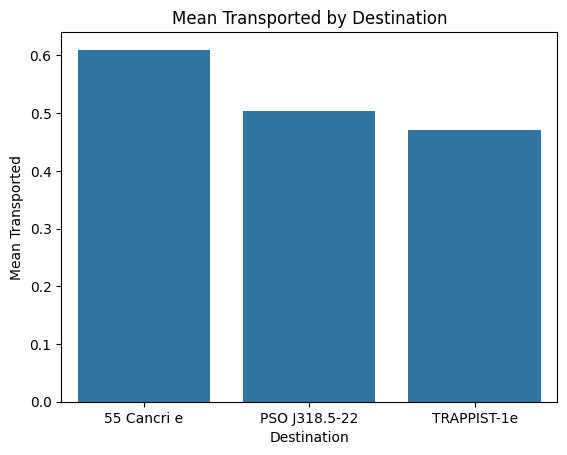

In [21]:
mean_transported = train_data.groupby('Destination')['Transported'].mean()
sns.barplot(x=mean_transported.index, y=mean_transported.values)
plt.ylabel('Mean Transported')
plt.title('Mean Transported by Destination')
plt.show()

In [22]:
train_data[['Cabin_1', 'Cabin_2', 'Cabin_3']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Cabin_1', 'Cabin_2', 'Cabin_3']] = test_data['Cabin'].str.split('/', expand=True)

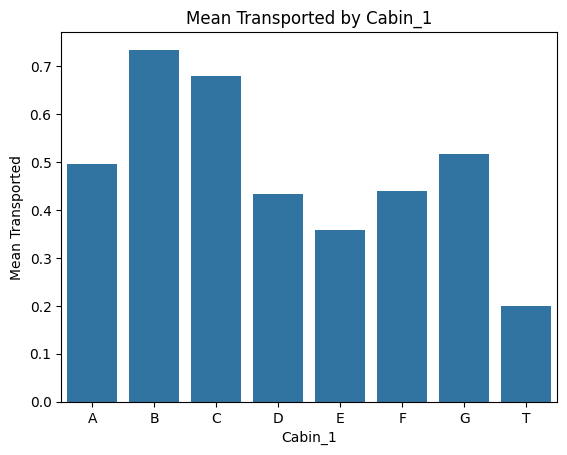

In [23]:
mean_transported = train_data.groupby('Cabin_1')['Transported'].mean()
sns.barplot(x=mean_transported.index, y=mean_transported.values)
plt.ylabel('Mean Transported')
plt.title('Mean Transported by Cabin_1')
plt.show()

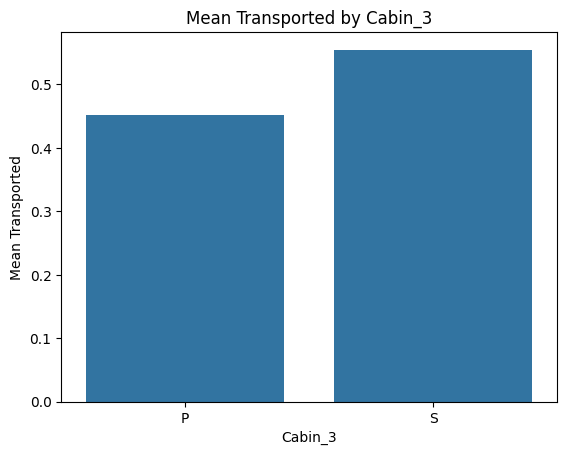

In [24]:
mean_transported = train_data.groupby('Cabin_3')['Transported'].mean()
sns.barplot(x=mean_transported.index, y=mean_transported.values)
plt.ylabel('Mean Transported')
plt.title('Mean Transported by Cabin_3')
plt.show()

In [25]:
train_data['FamilySize'] = train_data['PassengerId'].apply(lambda x: int(x.split('_')[1]))
test_data['FamilySize'] = test_data['PassengerId'].apply(lambda x: int(x.split('_')[1]))


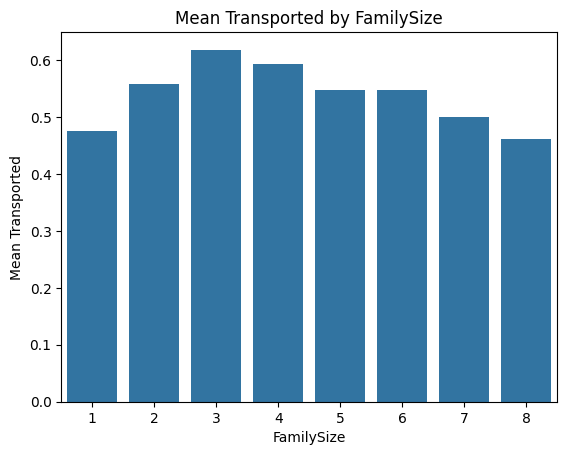

In [26]:
mean_transported = train_data.groupby('FamilySize')['Transported'].mean()
sns.barplot(x=mean_transported.index, y=mean_transported.values)
plt.ylabel('Mean Transported')
plt.title('Mean Transported by FamilySize')
plt.show()

In [27]:
cols = ['FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck']
for col in cols:
    train_data[col] = train_data[col].fillna(0)
    test_data[col] = test_data[col].fillna(0)

In [28]:
train_data['Spending'] = train_data[cols].sum(axis=1)
test_data['Spending'] = test_data[cols].sum(axis=1)

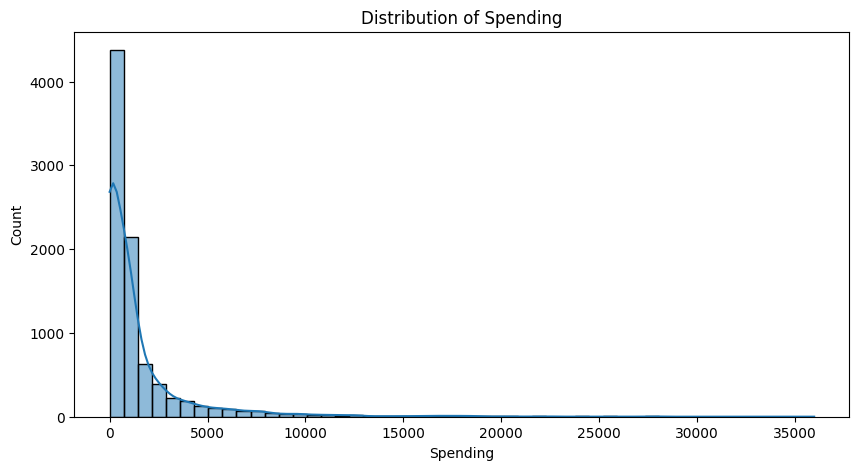

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Spending'], bins=50, kde=True)
plt.xlabel("Spending")
plt.ylabel("Count")
plt.title("Distribution of Spending")
plt.show()

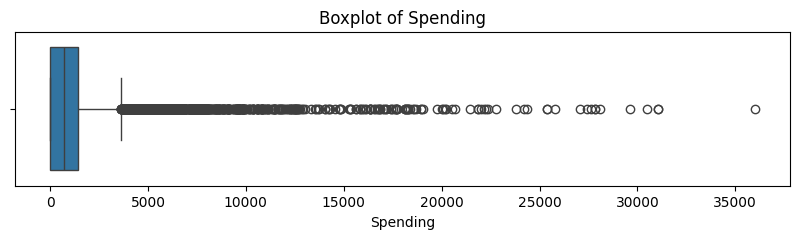

In [30]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=train_data['Spending'])
plt.title("Boxplot of Spending")
plt.show()


In [31]:
spending_skewness = skew(train_data['Spending'], nan_policy='omit')
print(f"Skewness of Spending: {spending_skewness:.4f}")

Skewness of Spending: 4.4168


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [33]:
features = ['Spending', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scaler = StandardScaler()

In [34]:
spent_money_train = train_data[train_data['Spending'] > 0].copy()
spent_money_test = test_data[test_data['Spending'] > 0].copy()

In [35]:
spent_money_train[features] = scaler.fit_transform(spent_money_train[features])
spent_money_test[features] = scaler.transform(spent_money_test[features])


In [36]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
spent_money_train['Cluster'] = kmeans.fit_predict(spent_money_train[features])
spent_money_test['Cluster'] = kmeans.predict(spent_money_test[features])


In [37]:
train_data['SpendingCluster'] = -1
test_data['SpendingCluster'] = -1
train_data.loc[train_data['Spending'] > 0, 'SpendingCluster'] = spent_money_train['Cluster'].values
test_data.loc[test_data['Spending'] > 0, 'SpendingCluster'] = spent_money_test['Cluster'].values


In [38]:
train_data['SpendingCluster'] = train_data['SpendingCluster'].astype('category')
test_data['SpendingCluster'] = test_data['SpendingCluster'].astype('category')

In [39]:
print(train_data.groupby('SpendingCluster')['Transported'].mean())


SpendingCluster
-1    0.786477
 0    0.315703
 1    0.006536
 2    0.018987
 3    0.104762
 4    0.781250
Name: Transported, dtype: float64


In [40]:
import scipy.stats as stats
print(train_data[['Spending', 'SpendingCluster']].corr())
stats.f_oneway(
    train_data[train_data['SpendingCluster'] == 0]['Spending'],
    train_data[train_data['SpendingCluster'] == 1]['Spending'],
    train_data[train_data['SpendingCluster'] == 2]['Spending']
)

                 Spending  SpendingCluster
Spending         1.000000         0.692172
SpendingCluster  0.692172         1.000000


F_onewayResult(statistic=np.float64(2919.8734623575574), pvalue=np.float64(0.0))

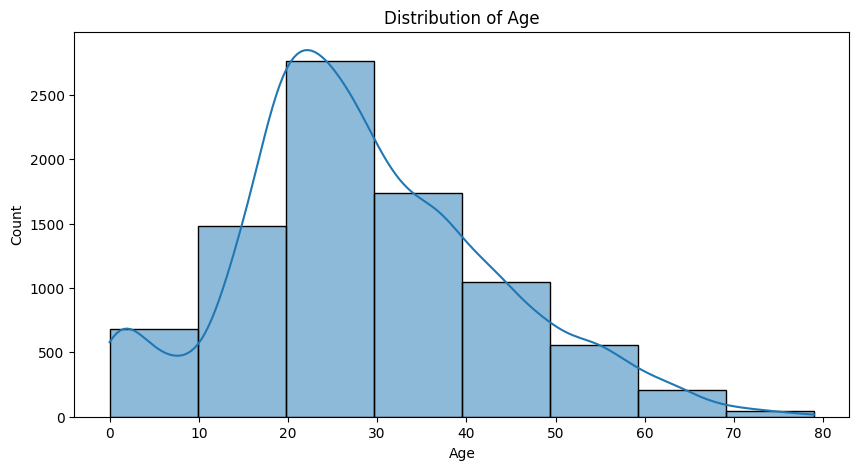

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Age'], bins=8, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

In [42]:
filtered_age = test_data[(test_data['Age'] == 0) | (test_data['Age'].isna())]
mean_age = train_data['Age'].mean(skipna=True)
train_data['Age'] = train_data['Age'].fillna(mean_age)

In [43]:
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      8693 non-null   object  
 1   HomePlanet       8492 non-null   object  
 2   CryoSleep        8476 non-null   object  
 3   Cabin            8494 non-null   object  
 4   Destination      8511 non-null   object  
 5   Age              8693 non-null   float64 
 6   VIP              8490 non-null   object  
 7   RoomService      8693 non-null   float64 
 8   FoodCourt        8693 non-null   float64 
 9   ShoppingMall     8693 non-null   float64 
 10  Spa              8693 non-null   float64 
 11  VRDeck           8693 non-null   float64 
 12  Name             8493 non-null   object  
 13  Transported      8693 non-null   bool    
 14  Cabin_1          8494 non-null   object  
 15  Cabin_2          8494 non-null   object  
 16  Cabin_3          8494 non-null   object  
